<a href="https://colab.research.google.com/github/ahd-rafi/Machine-Learning-Projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**






Jovian Link: https://jovian.ai/aakashns/python-sklearn-logistic-regression

In [ ]:
!pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od

od.version()

'0.1.22'

In [ ]:
dataset_url = "https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package"

# {"username":"ahmadrafi004","key":"6f5548a035e9c2ff47696ce25292b061"}

In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
import os

In [ ]:
data_dir =  "./weather-dataset-rattle-package"

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir + "/weatherAUS.csv"

In [ ]:
train_csv

'./weather-dataset-rattle-package/weatherAUS.csv'

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_csv)

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

**EDV AND VISULIZATION**

In [ ]:
!pip install matplotlib plotly seaborn --quiet --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.6 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
raw_df.nunique()

,0
Date,3436
Location,49
MinTemp,389
MaxTemp,503
Rainfall,679
Evaporation,355
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


In [ ]:
raw_df.Location.nunique()

49

In [ ]:
px.histogram(raw_df, x = 'Location', color = 'RainToday', title = 'location vs Rain today')

In [ ]:
px.histogram(raw_df, x = 'Temp3pm', color = 'RainTomorrow', title = 'Temp3pm vs Raintomorrow')

In [ ]:
px.histogram(raw_df, x = 'RainTomorrow', color = 'RainToday', title = 'Raintomorrow vs raintoday')

In [ ]:
px.scatter(raw_df.sample(2000),
           x = 'MinTemp',
           y = 'MaxTemp',
           title = 'MinTemp vs MaxTemp',
           color = 'RainToday')

In [ ]:
px.strip(raw_df.sample(2000),
         x = 'Temp3pm',
         y = 'Humidity3pm',
         color = 'RainTomorrow',
         title = 'Temp3pm vs humidity 3pm')

In [ ]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
use_sample = False

In [ ]:
sample_fraction = 0.1

In [ ]:
if use_sample:
  raw_df = raw_df.sample(frac=sample_fraction).copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [ ]:
print('train df shape: ', train_df.shape)
print('val df shape: ', val_df.shape)
print('test df shape: ', test_df.shape)

train df shape:  (84471, 23)
val df shape:  (28158, 23)
test df shape:  (28158, 23)


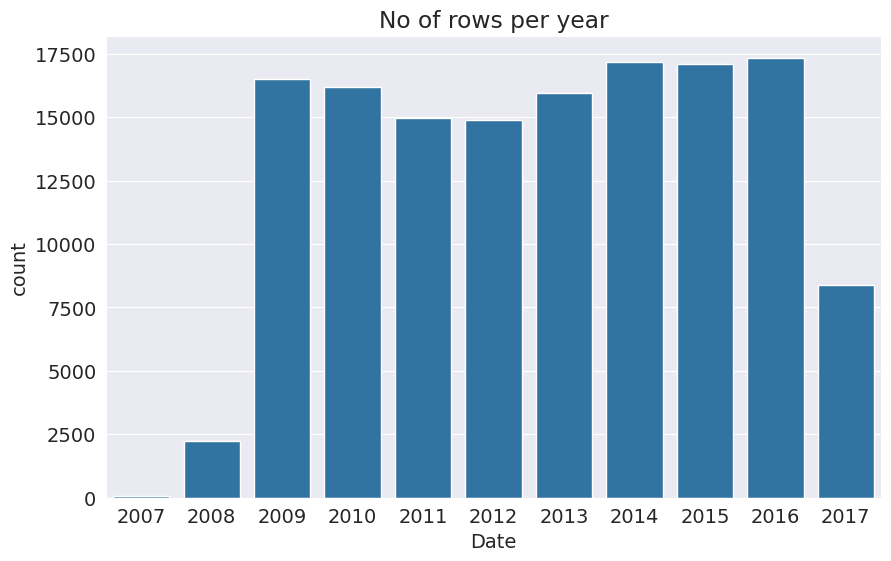

In [ ]:
plt.title('No of rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year);